In [57]:
import pandas as pd 
import seaborn as sns

df = pd.read_csv("../results/pca_knn_cuali_cuanti_experiment_results_n_12501.csv")

In [58]:
df.head(10)

,alpha,k,accuracy,recall,precision,time
0,5,25,0.58888,"[0.64488,0.53288]","[0.579928,0.60009]",33194082676
1,5,50,0.59260,"[0.69368,0.49152]","[0.577028,0.616063]",33125380633
2,5,75,0.59324,"[0.68056,0.50592]","[0.579378,0.612969]",33122054762
3,5,125,0.59764,"[0.69784,0.49744]","[0.58134,0.622111]",33108169214
4,5,250,0.59592,"[0.71744,0.4744]","[0.577166,0.626717]",33104910606
5,5,625,0.59472,"[0.73248,0.45696]","[0.57426,0.630742]",33114027879
6,5,1250,0.59184,"[0.74784,0.43584]","[0.57,0.633488]",33123352103
7,5,1875,0.58964,"[0.75416,0.42512]","[0.567447,0.6336]",33193577901
8,10,25,0.61316,"[0.6836,0.54272]","[0.599187,0.631716]",42865036302
9,10,50,0.61720,"[0.72832,0.50608]","[0.59589,0.650689]",42586413512


In [59]:
list(df)
%matplotlib inline

In [64]:
METRIC = 'accuracy'
df_graf2 = df[['alpha','k',METRIC]]
df_graf1 = df[['alpha','k','time']]
result = df_graf2.pivot(index='alpha', columns='k', values=METRIC)
result

k,25,50,75,125,250,625,1250,1875
alpha,,,,,,,,
5,0.58888,0.59260,0.59324,0.59764,0.59592,0.59472,0.59184,0.58964
10,0.61316,0.61720,0.62012,0.61832,0.61724,0.61448,0.60684,0.60560
15,0.62120,0.62428,0.62524,0.62404,0.62384,0.61964,0.61264,0.61028
20,0.63092,0.63276,0.63432,0.63812,0.63340,0.62676,0.62076,0.61608
50,0.65940,0.65736,0.66224,0.65880,0.65816,0.64772,0.63972,0.63300
100,0.65668,0.65596,0.65836,0.65708,0.65280,0.64564,0.63624,0.63292
500,0.65544,0.65468,0.65948,0.65812,0.65428,0.64604,0.63832,0.63604
1200,0.66008,0.66176,0.66688,0.66384,0.65876,0.65128,0.64384,0.63960
1500,0.66136,0.66116,0.66428,0.66264,0.65372,0.64600,0.63704,0.63424


/Users/lstrika/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


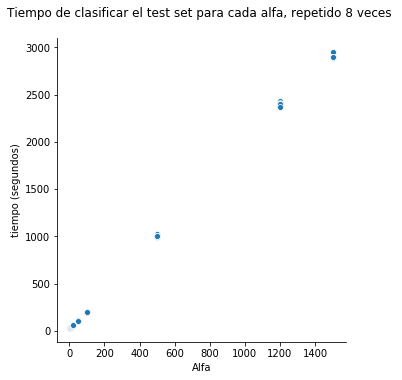

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
df_graf1['seconds'] = df_graf1.time/1e9
scatter_plot = sns.relplot(data=df_graf1, x='alpha', y='seconds')
# scatter_plot.fig.set_title('Tiempo de clasificar el test set en función de alpha, repetido 8 veces \n')
plt.title('Tiempo de clasificar el test set para cada alfa, repetido 8 veces \n')
plt.xlabel('Alfa')
plt.ylabel('tiempo (segundos)')
scatter_plot.savefig('tiempo_funcion_de_alfa_clasificar')

In [66]:
[x for x in dir(sns) if 'plot' in x]

['barplot',
 'boxenplot',
 'boxplot',
 'catplot',
 'countplot',
 'distplot',
 'dogplot',
 'factorplot',
 'jointplot',
 'kdeplot',
 'lineplot',
 'lmplot',
 'lvplot',
 'miscplot',
 'pairplot',
 'palplot',
 'plotting_context',
 'pointplot',
 'regplot',
 'relplot',
 'residplot',
 'rugplot',
 'scatterplot',
 'stripplot',
 'swarmplot',
 'tsplot',
 'violinplot']

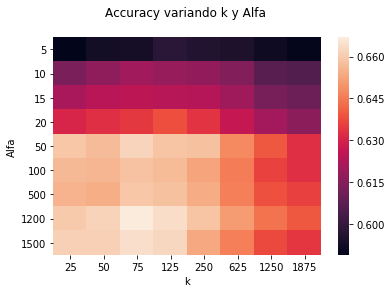

In [69]:
heatmap = sns.heatmap(data=result)
# scatter_plot.fig.set_title('Tiempo de clasificar el test set en función de alpha, repetido 8 veces \n')
plt.title('Accuracy variando k y Alfa \n')
plt.xlabel('k')
plt.ylabel('Alfa')
scatter_plot.get_figure().savefig('heatmap_accuracy_alpha_k')

In [82]:
df['recall 0'] = df.recall.apply(lambda x: float(str(x)[1:-1].split(',')[0]))
df['recall 1'] = df.recall.apply(lambda x: float(str(x)[1:-1].split(',')[1]))

In [83]:
df_graf2 = df[['alpha','k','recall 0']]
result_0 = df_graf2.pivot(index='alpha', columns='k', values='recall 0').dropna()
result_0

k,25,50,75,125,250,625,1250,1875
alpha,,,,,,,,
5,0.64488,0.69368,0.68056,0.69784,0.71744,0.73248,0.74784,0.75416
10,0.68360,0.72832,0.71520,0.72328,0.74192,0.75352,0.76144,0.77000
15,0.71584,0.76048,0.74752,0.75504,0.77528,0.78272,0.79552,0.80176
20,0.72800,0.76888,0.75632,0.77144,0.78760,0.79824,0.81144,0.81848
50,0.72408,0.75880,0.75056,0.75680,0.77256,0.77936,0.78944,0.79640
100,0.73016,0.76768,0.75488,0.76600,0.77976,0.78784,0.79736,0.80368
500,0.74704,0.78784,0.77816,0.78952,0.80448,0.80528,0.81120,0.81856
1200,0.74608,0.78856,0.78136,0.79464,0.81648,0.82576,0.83504,0.84232
1500,0.75872,0.80168,0.79392,0.80680,0.82456,0.83040,0.83544,0.83968


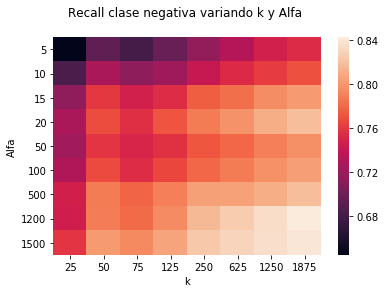

In [86]:
heatmap = sns.heatmap(data=result_0)
# scatter_plot.fig.set_title('Tiempo de clasificar el test set en función de alpha, repetido 8 veces \n')
plt.title('Recall clase negativa variando k y Alfa \n')
plt.xlabel('k')
plt.ylabel('Alfa')
scatter_plot.get_figure().savefig('recall clase negativa')

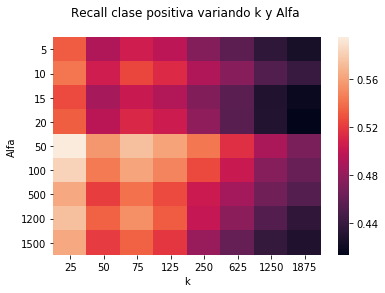

In [87]:
df_graf2 = df[['alpha','k','recall 1']]
result_1 = df_graf2.pivot(index='alpha', columns='k', values='recall 1').dropna()
heatmap = sns.heatmap(data=result_1)
# scatter_plot.fig.set_title('Tiempo de clasificar el test set en función de alpha, repetido 8 veces \n')
plt.title('Recall clase positiva variando k y Alfa \n')
plt.xlabel('k')
plt.ylabel('Alfa')
scatter_plot.get_figure().savefig('recall clase positiva')